<a href="https://colab.research.google.com/github/sakshi02sakshi/CVIP-DATA-SCIENCE-INTERN-/blob/main/Terrorism_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path='/content/drive/MyDrive/Terrorism data set/Terrorism data.csv'

In [ ]:
data=pd.read_csv(path,encoding='latin-1')

In [ ]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktypel_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targttype1_txt':'Target_type','weaptype1_txt':'weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','Killed','Wounded','Target','Summary','Group','weapon_type','Motive']]

In [ ]:
data.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude  Killed  Wounded  \
0  Santo Domingo  18.456792  -69.951164     1.0      0.0   
1    Mexico city  19.371887  -99.086624     0.0      0.0   
2        Unknown  15.478598  120.599741     1.0      0.0   
3         Athens  37.997490   23.762728     NaN      NaN   
4        Fukouka  33.580412  130.396361     NaN      NaN   

                    Target Summary                               Group  \
0             Julio Guzman     NaN                              MANO-D   
1  Nadine Chaval, daughter     NaN  23rd of September Communist League   
2                 Employee     NaN                             Unknown   
3             U.S. Embassy     NaN                             Unknown   
4           U.S. Consulate     NaN                             Unknown   

  weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Killed'}>],
       [<Axes: title={'center': 'Wounded'}>, <Axes: >, <Axes: >]],
      dtype=object)

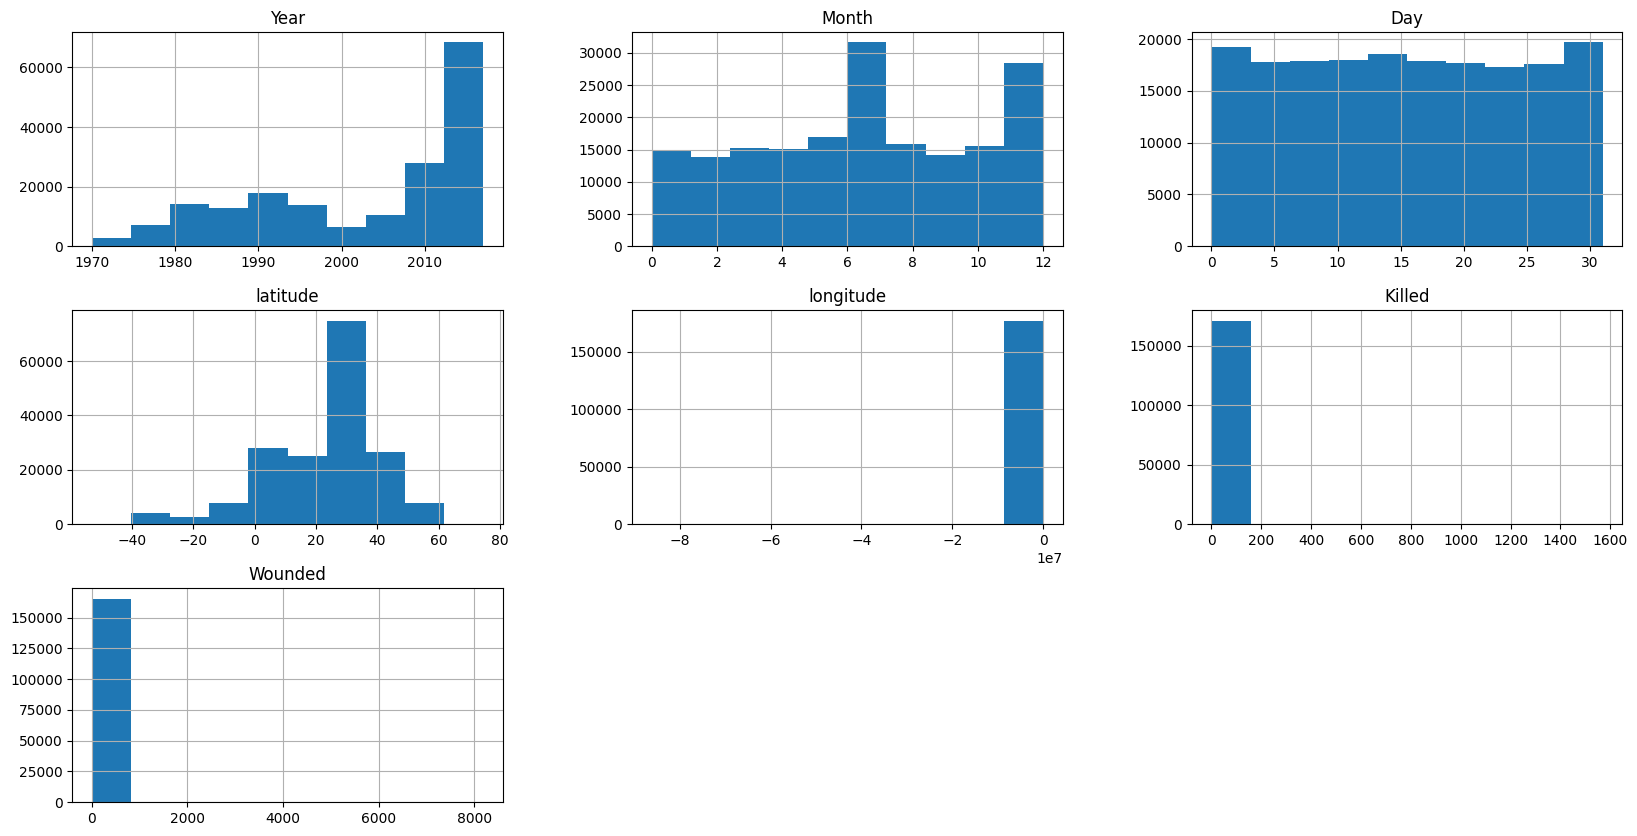

In [ ]:
data.hist(figsize=(20,10))

In [ ]:
data.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

**Correlation analysis**

<Axes: >

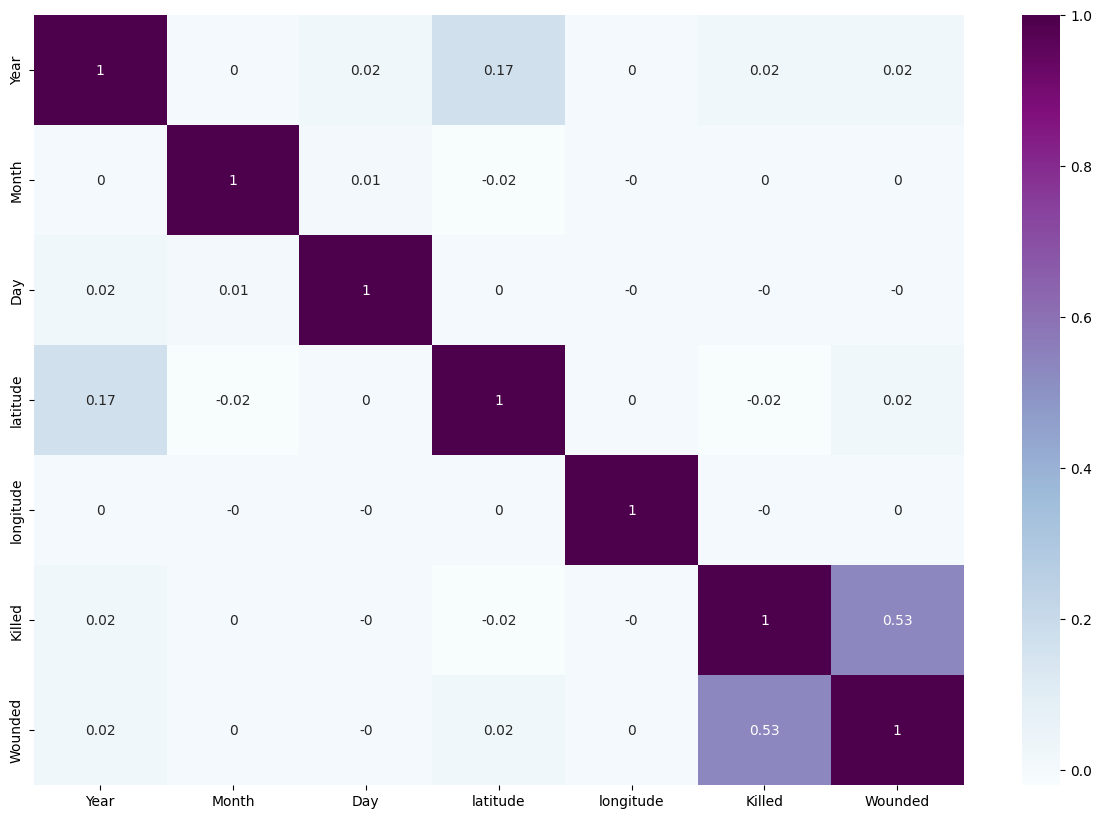

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(data.corr(),2),annot=True, cmap='BuPu')

**Terrorist Activities By Region in each Year through Area Plot**

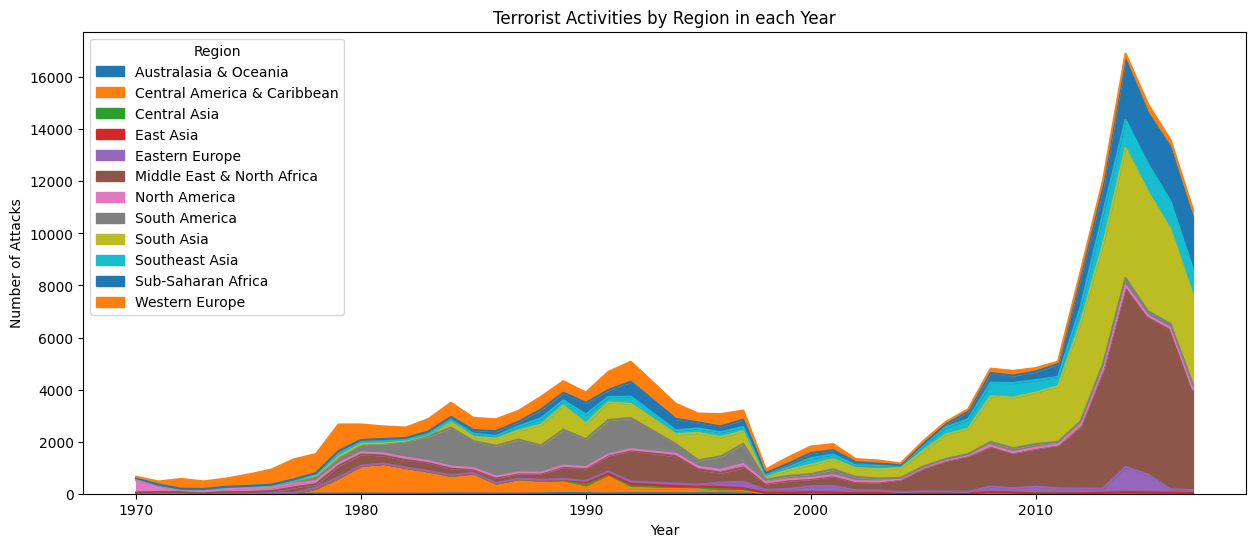

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

** Number of Terrorist Activities each Year**

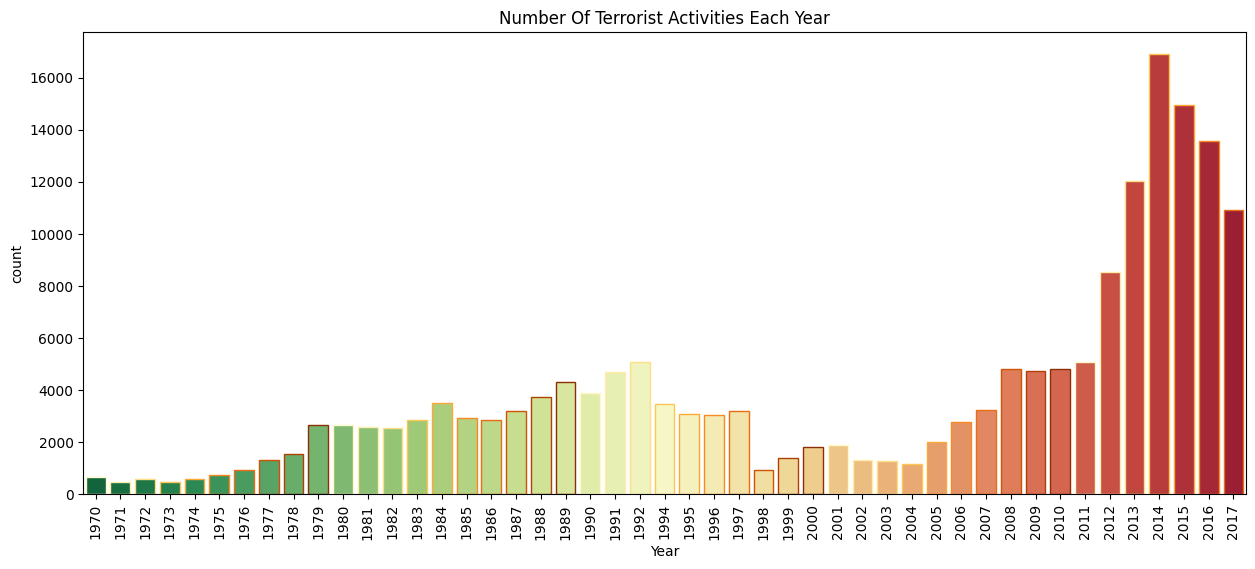

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=data, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

**Number of attack were there in 1970 & 2017 and Also find percentage the attacks have increased.**

In [ ]:
Year=data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


** The number of casualities corresponding to the killed people in each country for each year.**

In [ ]:
px.scatter(data,data.Wounded,data.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',
           range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')

**Total number of terrorist attack in each country and regions using barplot
**

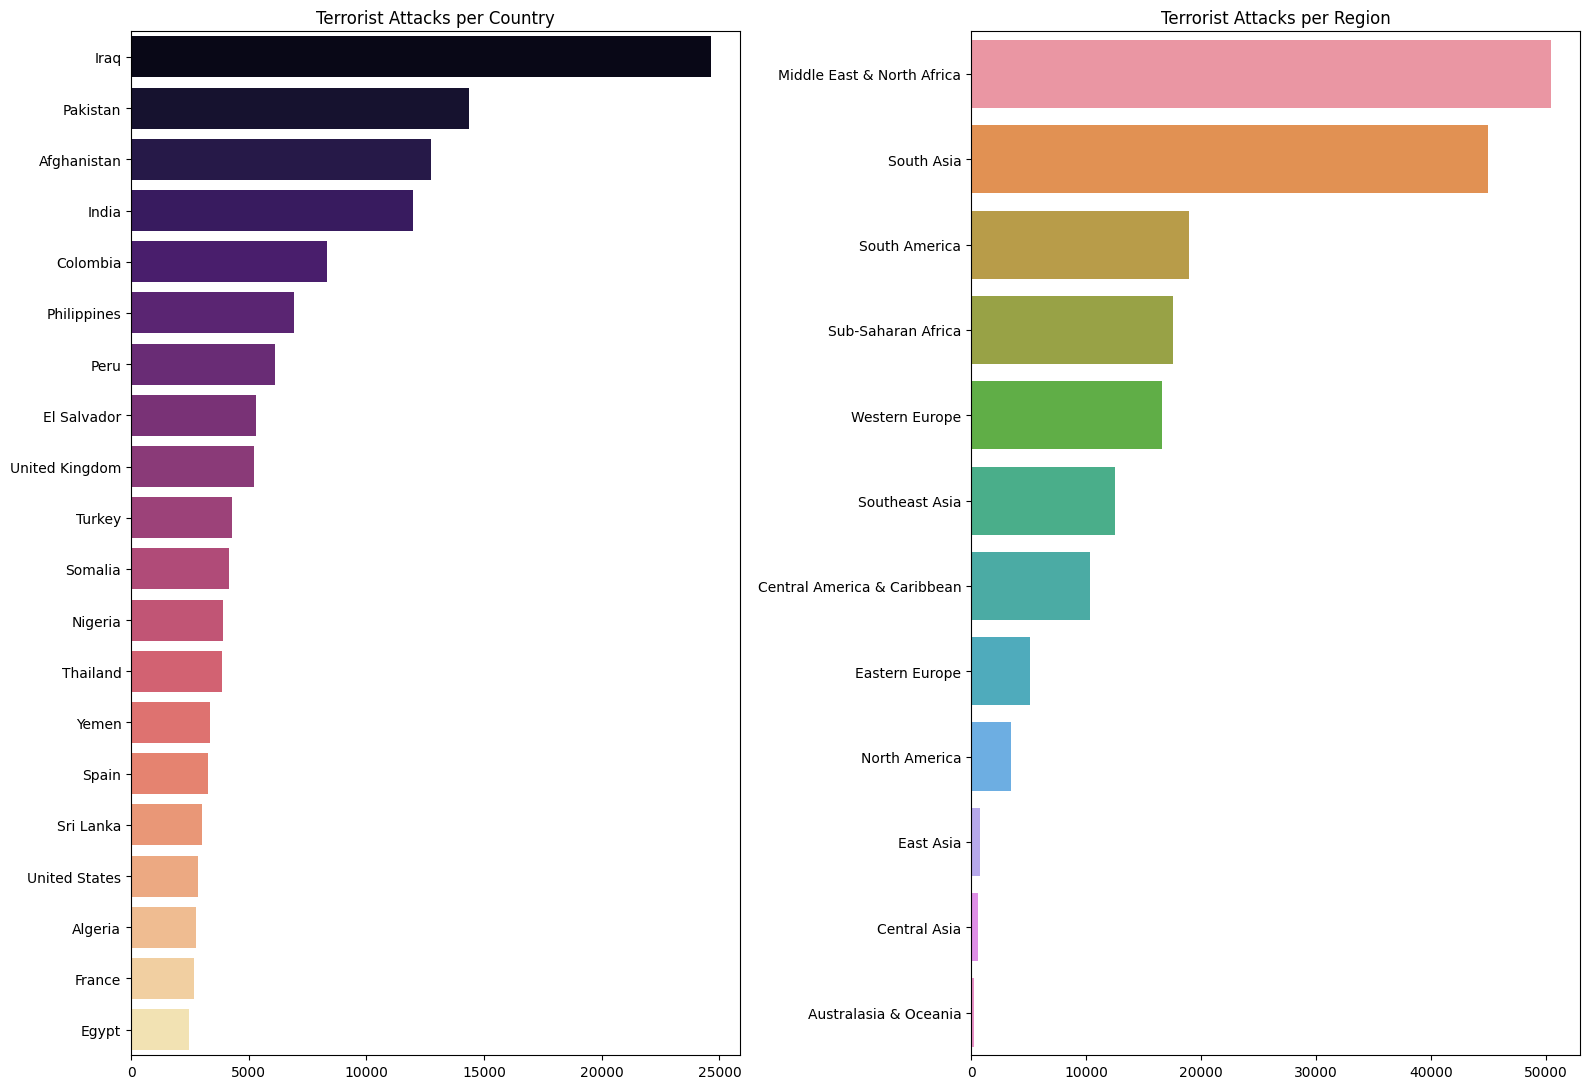

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index,
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

**We will first create a new dataframe which contains the total count of attacks for each country in order to use it as a colour bar.**

In [ ]:
terr=data.groupby(['Country'],as_index=False).count()


In [ ]:
fig=px.choropleth(terr,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

**Country suffered the maximum attacks(state the number) and country suffered minimum attacks(state the number)**

In [ ]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [ ]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


**Now let us check out which terrorist organizations have carried out their operations in each country.**

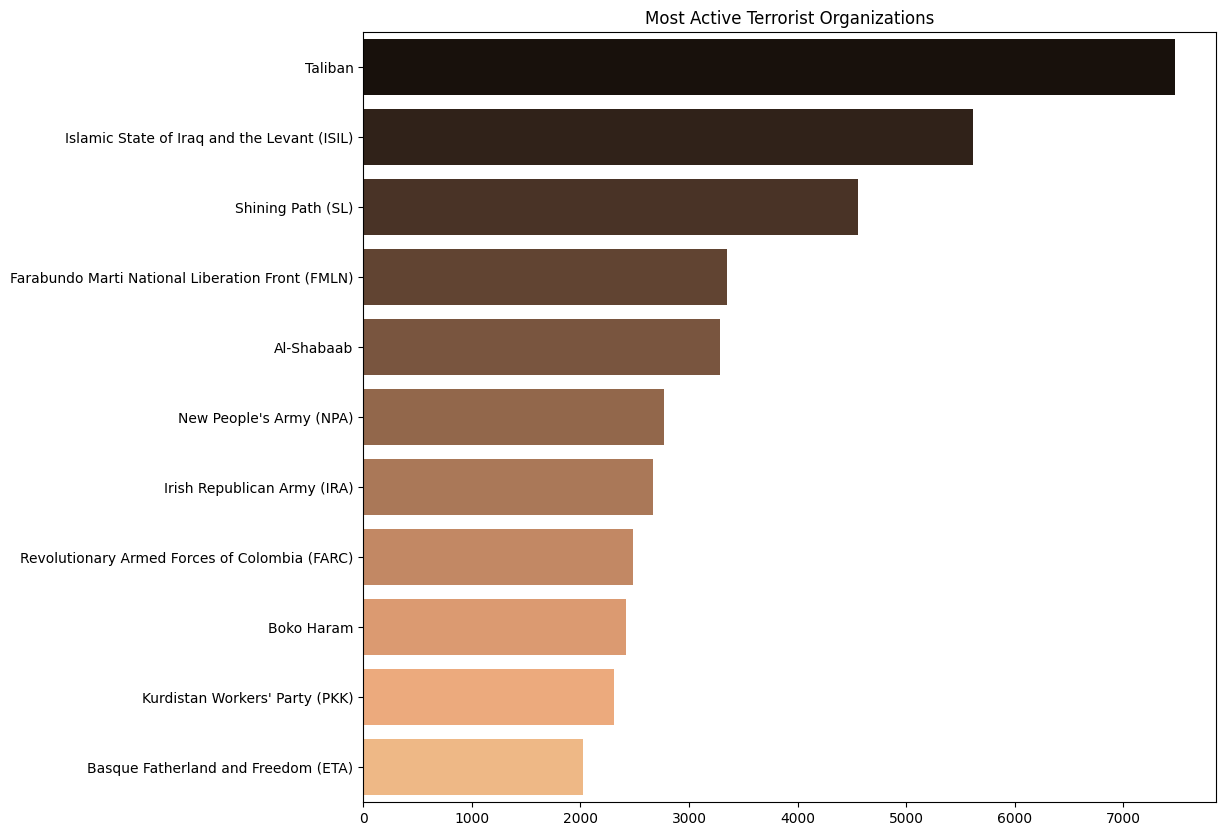

In [ ]:
plt.subplots(figsize=(11,10))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

**Now we will look closer at trend Before and after the War on Terror**

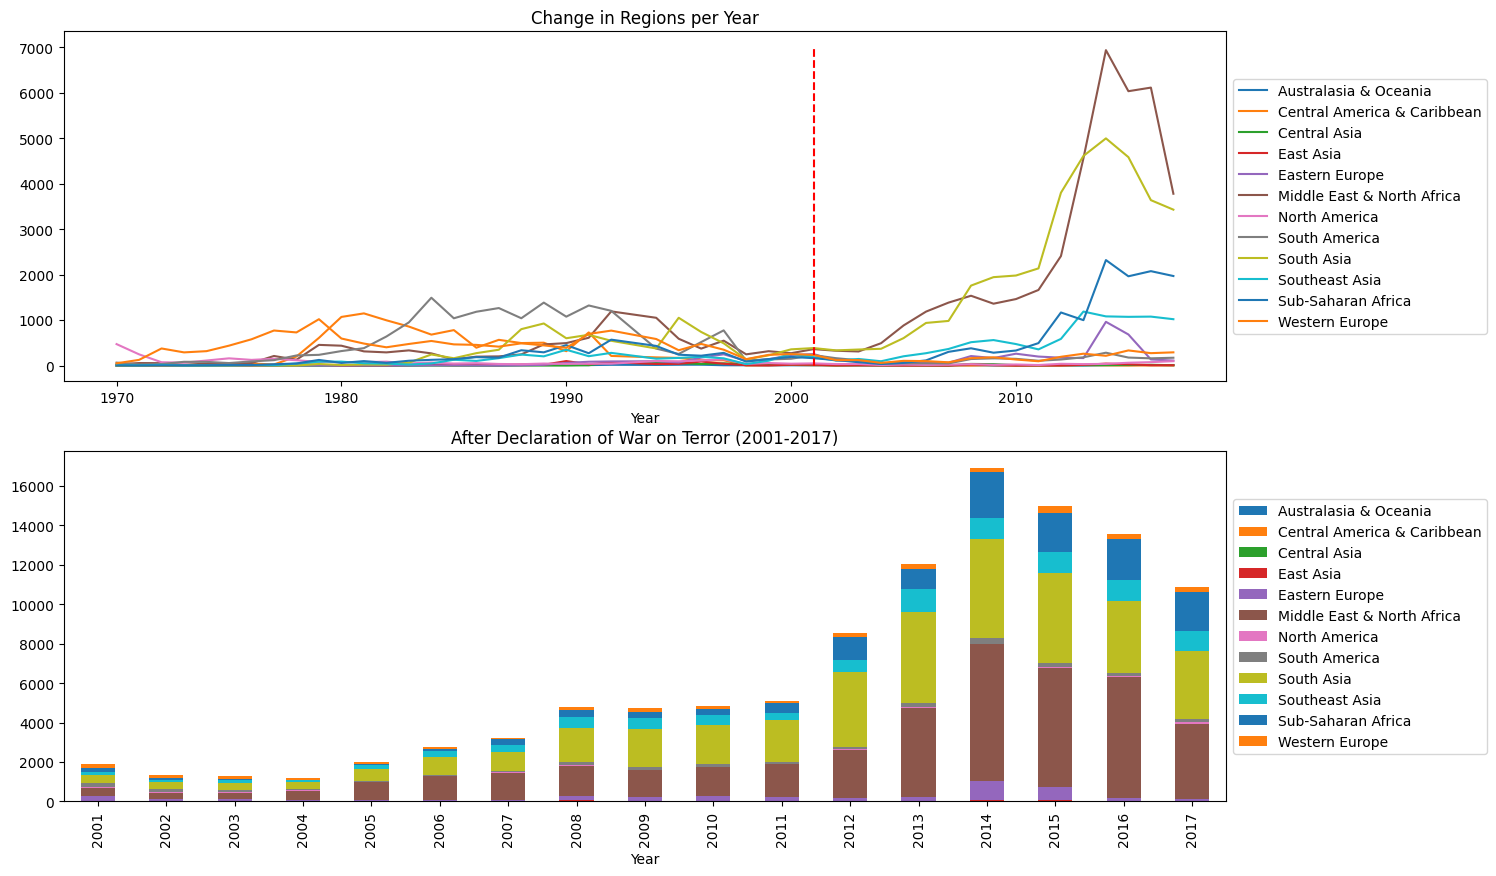

In [ ]:
data_after = data[data['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(data.Year,data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

***
Insights derived from the above EDA:***





1.  Attacks has increased but number of people killed manier times as attack happened.
2.Iraq has the most attacks.  
3. The Middle East and North Africa Regions has most taregeted.
4. Maximum number of attacks are from Bombing/Explosions.
5. There are maximum number of attacks in Private citizens and Property.
6. Taliban and ISIL has a most active organisation.



